In [1]:
import numpy as np
import matplotlib.pyplot as plt
from groupy import *

Frechet Functional Value: 2.0


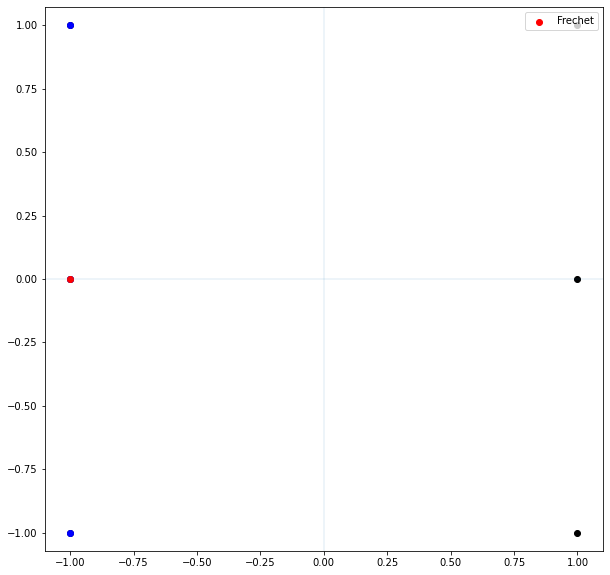

In [20]:
N = 3
p = 2
# X = generate_points_within_ball(N, p, 1.4, np.array([1,1]))
X = np.array([[-1,1,1],[1,1,0]])
G = Greps_pmId

X_orbits = G(X)
u, Y = Frechet(X, G)

fig = plt.figure(figsize = (10,10))


plt.scatter(X_orbits[0,:], X_orbits[1,:], color = 'black')
plt.scatter(Y[0,:], Y[1,:], color = 'blue')
plt.scatter(*u.T, label = 'Frechet', color = 'red')
plt.axhline(0, alpha=.1)
plt.axvline(0, alpha=.1)

plt.legend()
plt.axis('equal')

print("Frechet Functional Value:", np.sum(np.sum((Y.T-u)**2,axis=1)))

In [27]:
u = np.mean(X,axis=1)

In [32]:
Yprime.T-v

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [30]:
v = IterativeFrechet(X, G, u =u)
print("Frechet Functional Value:", np.sum(np.sum((Yprime.T-v)**2)))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [21]:
for i in range(N):
    uprime, Yprime, niter = IterativeFrechet(X, G, u = X[:,i])
    print("Frechet Functional Value:", np.sum(np.sum((Yprime.T-uprime)**2,axis=1)))

Frechet Functional Value: 3.3333333333333335
Frechet Functional Value: 3.3333333333333335
Frechet Functional Value: 2


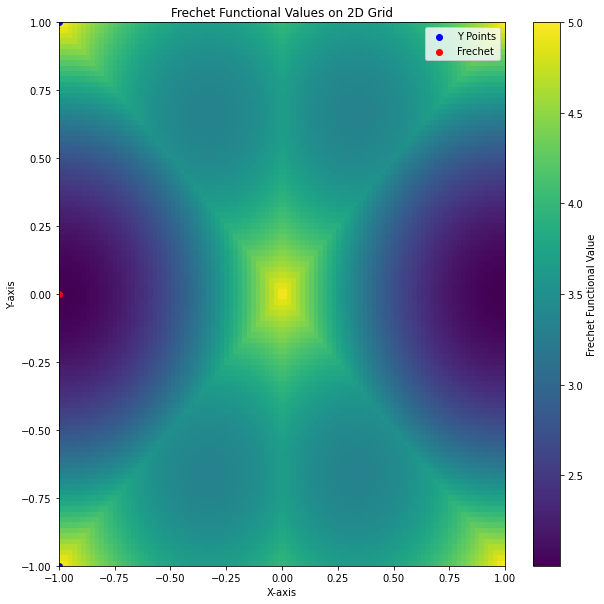

In [23]:
M = 100
x_min, x_max = np.min(X_orbits), np.max(X_orbits)
grid_x, grid_y = np.mgrid[x_min:x_max:M*1j, x_min:x_max:M*1j]  # 100x100 grid
frechet_values = np.zeros_like(grid_x)

# Evaluate Frechet functional for each point in the grid
for i in range(grid_x.shape[0]):
    for j in range(grid_x.shape[1]):
        point = np.array([grid_x[i, j], grid_y[i, j]])
        frechet_values[i, j] = FrechetFunctional(point, X, G)
    
# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(frechet_values.T, extent=(x_min, x_max, x_min, x_max), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Frechet Functional Value')

# Scatter plot for Y and u points
plt.scatter(Y[0, :], Y[1, :], color='blue', label='Y Points')
plt.scatter(*u.T, label='Frechet', color='red')

plt.title('Frechet Functional Values on 2D Grid')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [74]:
# N = 10
# p = 2
# X = 2*np.random.rand(p,N) -1
# G = Greps_Rotate

X_orbits = G(X)
u, Y = IterativeFrechet(X, G, np.array([-.3,1]))

fig = plt.figure(figsize = (10,10))

plt.scatter(X_orbits[0,:], X_orbits[1,:], color = 'black')
plt.scatter(Y[0,:], Y[1,:], color = 'blue')
plt.scatter(*u.T, label = 'Frechet', color = 'red')
plt.legend()

print("Frechet Functional Value:", np.sum(np.sum((Y.T-u)**2,axis=1)))

ValueError: operands could not be broadcast together with shapes (3,3) (2,) 

Frechet Functional Value: 98.57429768310911


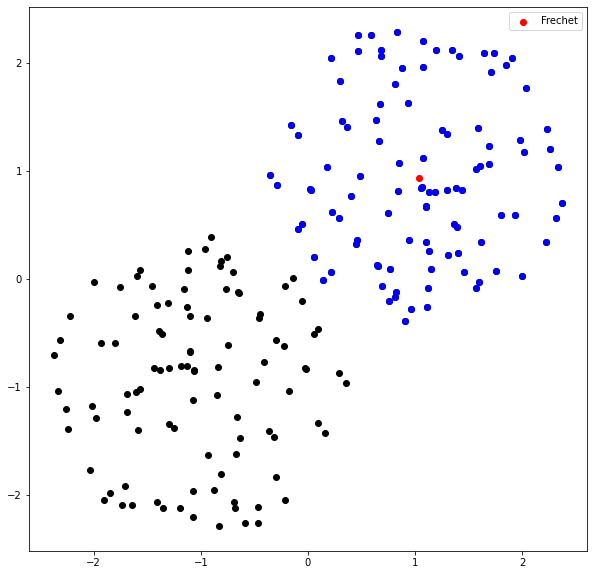

In [6]:
# N = 10
# p = 2
# X = 2*np.random.rand(p,N) -1
# G = Greps_Rotate

X_orbits = G(X)
u, Y = FrechetGD(X, G, np.array([0,.5]), alpha=.1)

fig = plt.figure(figsize = (10,10))

plt.scatter(X_orbits[0,:], X_orbits[1,:], color = 'black')
plt.scatter(Y[0,:], Y[1,:], color = 'blue')
plt.scatter(*u.T, label = 'Frechet', color = 'red')
plt.legend()

print("Frechet Functional Value:", np.sum(np.sum((Y.T-u)**2,axis=1)))

# $R^3$ 8 element group example 

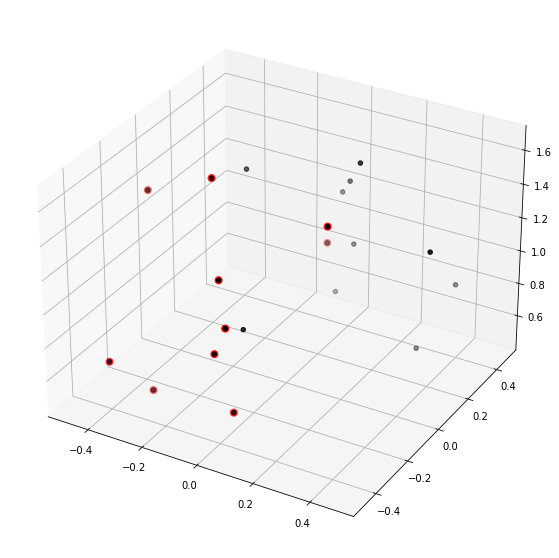

In [77]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the values
ax.scatter(X[0,:], X[1,:], X[2,:], color = 'red', s = 50)
ax.scatter(X_orbits[0,:], X_orbits[1,:], X_orbits[2,:], color = 'black')

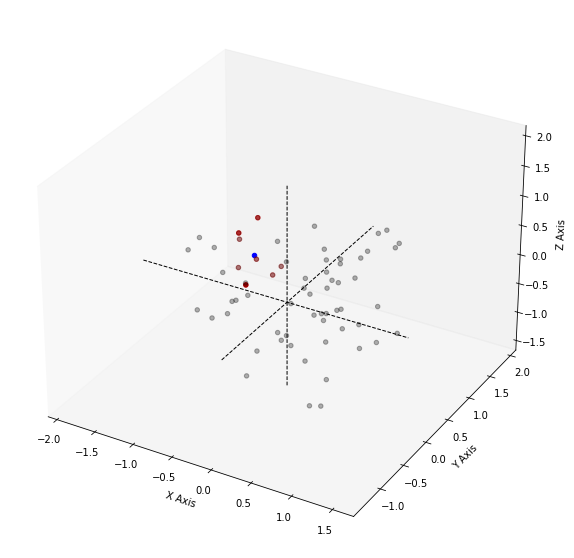

In [2]:
N = 8
# p fixed at 3
X = 2*np.random.rand(3,N) - 1
G = Greps_2R1R

X_orbits = G(X)
u, Y = Frechet(X, G)

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the values
ax.scatter(X_orbits[0,:], X_orbits[1,:], X_orbits[2,:], color = 'black', alpha=0.3)
ax.scatter(Y[0,:], Y[1,:], Y[2,:], color = 'red')
ax.scatter(*u.T, label = 'Frechet', color = 'blue')

# Set axis labels
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")


ax.plot([0, 0], [-.5 + X_orbits[1, :].min(), .5 + X_orbits[1, :].max()], [0, 0], color='black', linewidth=1, ls = '--')
ax.plot([-.5 + X_orbits[0, :].min(), .5 + X_orbits[0, :].max()], [0, 0], [0, 0], color='black', linewidth=1, ls = '--')
ax.plot([0, 0], [0, 0], [-.5 + X_orbits[2, :].min(), .5 + X_orbits[2, :].max()], color='black', linewidth=1, ls = '--')


ax.grid(False)
plt.show()

# Testing Frechet Uniqueness when Points Far from Origin

In [59]:
# silly bad generation method
def gap(n, radial_noise=0.5, radius = 10):
    # Angle range
    angle_min = - np.pi / 3
    angle_max =  np.pi / 3
    
    # Generate random angles in the specified range
    angles = np.random.uniform(angle_min, angle_max, n)
    
    # Generate radial noise
    noise = np.random.uniform(-radial_noise, radial_noise, n)
    
    # Calculate noisy radius
    noisy_radius = radius + noise

    # Convert polar coordinates to Cartesian
    X = np.array([noisy_radius * np.cos(angles), noisy_radius * np.sin(angles)])

    return X

Frechet Functional Value: 937.2787062606362


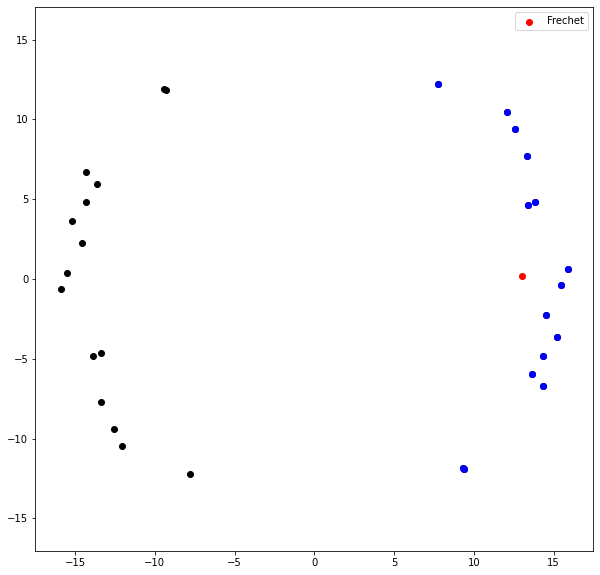

In [61]:
N = 10
p = 2
X = gap(15, 1, radius = 15)
G = Greps_pmId

X_orbits = G(X)
u, Y = Frechet(X, G)

fig = plt.figure(figsize = (10,10))


plt.scatter(X_orbits[0,:], X_orbits[1,:], color = 'black')
plt.scatter(Y[0,:], Y[1,:], color = 'blue')
plt.scatter(*u.T, label = 'Frechet', color = 'red')
plt.legend()
plt.axis('equal')

print("Frechet Functional Value:", np.sum(np.sum((Y.T-u)**2,axis=1)))

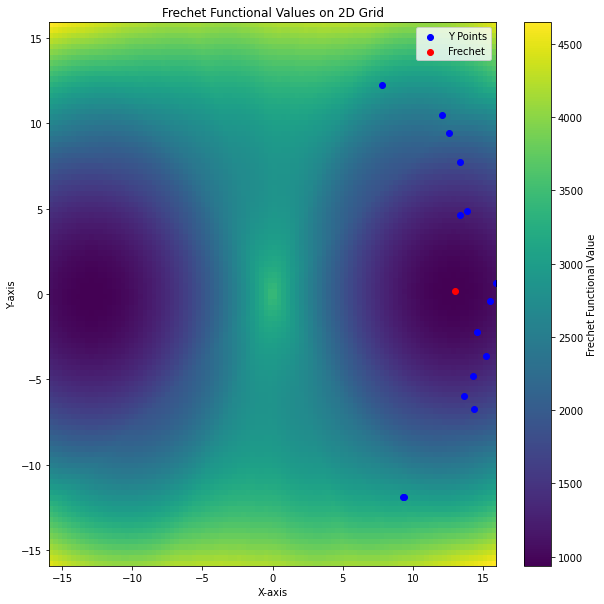

In [62]:
M = 100
x_min, x_max = np.min(X_orbits), np.max(X_orbits)
grid_x, grid_y = np.mgrid[x_min:x_max:M*1j, x_min:x_max:M*1j]  # 100x100 grid
frechet_values = np.zeros_like(grid_x)

# Evaluate Frechet functional for each point in the grid
for i in range(grid_x.shape[0]):
    for j in range(grid_x.shape[1]):
        point = np.array([grid_x[i, j], grid_y[i, j]])
        frechet_values[i, j] = FrechetFunctional(point, X, G)

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(frechet_values.T, extent=(x_min, x_max, x_min, x_max), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Frechet Functional Value')

# Scatter plot for Y and u points
plt.scatter(Y[0, :], Y[1, :], color='blue', label='Y Points')
plt.scatter(*u.T, label='Frechet', color='red')

plt.title('Frechet Functional Values on 2D Grid')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()